В этом дз необходимо обучить модели для классификации. Cегодня попробуем отличать настоящие новости от фейковых



In [ ]:
# ячейка импортов

import numpy as np
import pandas as pd

# импорт моделей
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report # табличка с метриками

import matplotlib.pyplot as plt
from collections import Counter

# import warnings
# warnings.filterwarnings("ignore")
%matplotlib inline 


In [4]:
import sklearn
version(sklearn)

NameError: ignored

# Exploratory Data Analysis (EDA)



In [ ]:
! unzip "news_fake-n-true.csv.zip"

Archive:  news_fake-n-true.csv.zip
  inflating: news_fake-n-true.csv    
  inflating: __MACOSX/._news_fake-n-true.csv  


In [ ]:
data = pd.read_csv("news_fake-n-true.csv")
data.head(4)

,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


**колонка label отвечает за тип новости: настоящие имеют лейбл 1,  фейковые новости -- с лейблом 0** 

In [ ]:
# создадим новый датафрейм из старого

data_clean = data.drop(['Unnamed: 0','title','subject','date'], axis=1)

display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


распределение настоящих и фейковых новостей примерно равное

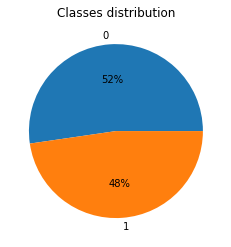

In [ ]:
classes =pd.value_counts(data_clean["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

**давайте попробуем предсказать:** окажется ли текст настоящей новостью или фейковой

- Векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку

Попробуйте обучить разные модели для классификации на данных
1. Naive Bayes
2. SVM 
3. Decision Trees
4. Random Forest
5. Boosting

Для каждой модели посмотрите на метрики с помощью функции [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Какая/какие модель/ли справляются с задачей наиболее эффективно?

# 1. Naive Bayes

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean["text"])

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['label'], 
                                                                    test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)

(35918, 122002) (8980, 122002)


In [ ]:
list_alpha = np.arange(1/100000, 40, 0.11) 

score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [ ]:
for alpha in list_alpha: 
    bayes = naive_bayes.MultinomialNB(alpha=alpha) 
    bayes.fit(X_train, y_train) 
    
    score_train[count] = bayes.score(X_train, y_train)    
    score_test[count]= bayes.score(X_test, y_test)    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 

In [ ]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])


display(models.head(10))
display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.978896,0.964811,0.956593,0.968869
1,0.11001,0.966034,0.961024,0.958705,0.959155
2,0.22001,0.964447,0.960022,0.958470,0.957347
3,0.33001,0.963389,0.959243,0.958236,0.955993
4,0.44001,0.962498,0.958686,0.958001,0.955088
5,0.55001,0.961885,0.958575,0.958001,0.954864
6,0.66001,0.961468,0.958352,0.958001,0.954418
7,0.77001,0.961078,0.958129,0.957766,0.954184
8,0.88001,0.960605,0.957906,0.957297,0.954163
9,0.99001,0.960131,0.957572,0.957062,0.953706


(364, 5)

In [ ]:
best_index = models['Test Accuracy'].idxmax()  #при максимальном accuracy самые большие остальные метрики
best_index

display(models.iloc[best_index])

alpha             0.000010
Train Accuracy    0.978896
Test Accuracy     0.964811
Test Recall       0.956593
Test Precision    0.968869
Name: 0, dtype: float64

In [ ]:
bayes_accuracy = models.iloc[best_index]["Test Accuracy"]
bayes_recall = models.iloc[best_index]["Test Recall"]
bayes_precision = models.iloc[best_index]["Test Precision"]

# 2. SVM

In [ ]:
data_small = data_clean.iloc[:10000]   #уменьшаем размер корпуса

display(data_small)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
9995,BRAS LIA (Reuters) - Brazilian police raided t...,1
9996,The game plan for Republicans isn t exactly di...,0
9997,"By now, everyone knows that the Jared Kushner ...",0
9998,OSLO (Reuters) - Ex-Bosnian Serb general Rakto...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_small["text"])

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data_small['label'], 
                                                                    test_size=0.2, random_state=50)

print(X_train.shape, X_test.shape)

(8000, 63897) (2000, 63897)


In [ ]:
list_C = np.arange(500, 4500, 500) 
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

In [ ]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,0.999875,0.9925,0.988494,0.995785
1,1000.0,0.999875,0.9925,0.988494,0.995785
2,1500.0,0.999875,0.9925,0.988494,0.995785
3,2000.0,0.999875,0.9925,0.988494,0.995785
4,2500.0,0.999875,0.9925,0.988494,0.995785
5,3000.0,0.999875,0.9925,0.988494,0.995785
6,3500.0,0.999875,0.9925,0.988494,0.995785
7,4000.0,0.999875,0.9925,0.988494,0.995785


In [ ]:
best_index = models['Test Precision'].idxmax() # метрики одинаковые при всех C
best_index

display(models.iloc[best_index])

C                 500.000000
Train Accuracy      0.999875
Test Accuracy       0.992500
Test Recall         0.988494
Test Precision      0.995785
Name: 0, dtype: float64

In [ ]:
svm_accuracy = models.iloc[best_index]["Test Accuracy"]
svm_recall = models.iloc[best_index]["Test Recall"]
svm_precision = models.iloc[best_index]["Test Precision"]

# 3. Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier()

In [ ]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree_y_pred = tree_clf.predict(X_test)

In [ ]:
DT_recall = metrics.recall_score(y_test, tree_y_pred)
DT_precision = metrics.precision_score(y_test, tree_y_pred)
DT_accuracy = metrics.accuracy_score(y_test, tree_y_pred)

print(DT_accuracy, DT_recall, DT_precision)

0.9925 0.9895397489539749 0.9947423764458465


# 4. Random Forest

In [ ]:
forest = RandomForestClassifier(n_estimators=1000, verbose=1)

In [ ]:
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_test)  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    2.0s finished


In [ ]:
RF_recall = metrics.recall_score(y_test, forest_y_pred)
RF_precision = metrics.precision_score(y_test, forest_y_pred)
RF_accuracy = metrics.accuracy_score(y_test, forest_y_pred)

print(RF_accuracy, RF_recall, RF_precision)

0.9835 0.9790794979079498 0.9863013698630136


In [ ]:
results = {"NB": [bayes_accuracy, bayes_recall, bayes_precision],
           "SVM": [svm_accuracy, svm_recall, svm_precision],
           "DT": [DT_accuracy, DT_recall, DT_precision],
           "RF": [RF_accuracy, RF_recall, RF_precision]}
df = pd.DataFrame.from_dict(results, orient='index', columns = ["Accuracy", "Recall", "Precision"])
df

,Accuracy,Recall,Precision
NB,0.964811,0.956593,0.968869
SVM,0.992500,0.988494,0.995785
DT,0.992500,0.989540,0.994742
RF,0.983500,0.979079,0.986301
